<a href="https://colab.research.google.com/github/siliconemonster/IA-2020.1/blob/main/exerc%C3%ADcio_AlineLarissa_IA_arvore_de_decis%C3%A3o_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Árvore de Decisão

Inicialmente são carregadas as bibliotecas necessárias: 

+ pandas (https://pandas.pydata.org/): biblioteca para análise de dados em python
+ scikit-learn (https://scikit-learn.org/stable/): biblioteca de ferramentas de aprendizagem de máquina em python

In [3]:
# Carregando Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn
from sklearn.model_selection import train_test_split

Usaremos como base de dados o arquivo "exemplo_IA.csv" com os dados usados no exemplo da "aula 9 - video 3 - aprendizado de máquina.pdf".

In [4]:
# Nome dos atributos
col_names = ['Outlook','Temperature','Humidity','Wind','PlayTennis']

# carregando a base de dados a ser usada
exemplo = pd.read_csv("/content/drive/MyDrive/exemplo_IA.csv", header=None, names=col_names)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# podemos ver os primeiros elementos do arquivo
exemplo.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [7]:
# definir o conceito alvo e as features usadas

feature_cols = ['Outlook','Temperature','Humidity','Wind'] # features (atributos) que serão usadas no aprendizado

X = exemplo[feature_cols] # selecionamos as colunas correspondentes aos atributos que serão usados
y = exemplo.PlayTennis # conceito que queremos aprender. Selecionamos a coluna com a classificação das instâncias

Os dados do nosso exemplo são categóricos e o classificador de árvore de decisão do scikit não funciona para este tipo de dado. Precisamos preparar os dados antes construir nosso classificador. Para isso vamos usar a função do pandas "pd.get_dummies" que converte os atributos categóricos em atributos com valores 0 e 1.
Por exemplo, o atributo Humidity que pode receber os valores High e Normal, passa a ser representado pelos atributos Humidity_High e Humidity_Normal, que podem receber os valores 0 e 1.

In [8]:
Xone_hot_data = pd.get_dummies(X[['Outlook','Temperature','Humidity','Wind']]) #transformando o dataset
#Xone_hot_data.head()
display(Xone_hot_data)

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


Vamos criar agora o nosso classificador de árvore de decisão, usando como função para seleção do atributo a entropia:

In [9]:
# Criação do classificador de árvore de decisão 
clf = DecisionTreeClassifier(criterion="entropy")
clf_g = DecisionTreeClassifier(criterion="gini")

# Separando meu exemplo para treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(Xone_hot_data, y, test_size=0.2)
print("Treino:")
display(Y_train.to_frame())
print("Teste:")
display(Y_test.to_frame())


# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(X_train, Y_train)
clf_g = clf_g.fit(X_train, Y_train)

#Testando com 100% - 0%
#clf = clf.fit(Xone_hot_data, y)
#clf_g = clf_g.fit(Xone_hot_data, y)

Treino:


,PlayTennis
8,Yes
12,Yes
5,No
11,Yes
0,No
13,No
1,No
9,Yes
3,Yes
4,Yes


Teste:


,PlayTennis
2,Yes
6,Yes
10,Yes


Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:
https://graphviz.org/
https://pypi.org/project/graphviz/

Entropia


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


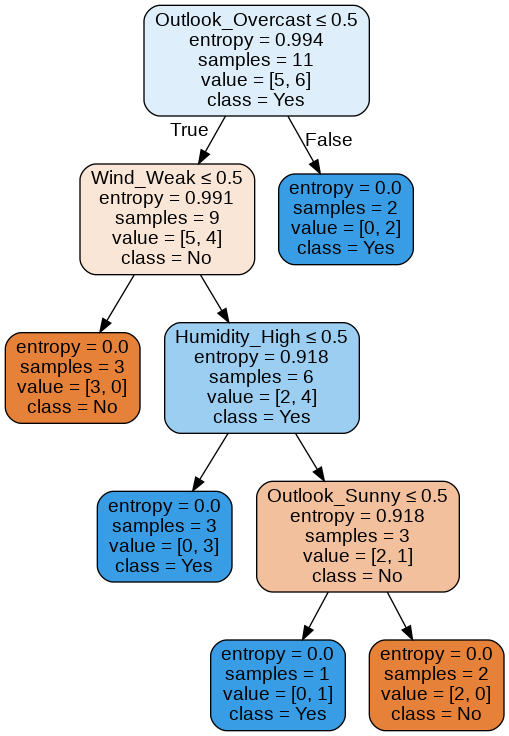

In [10]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o one-hot acrescenta mais
print("Entropia")
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

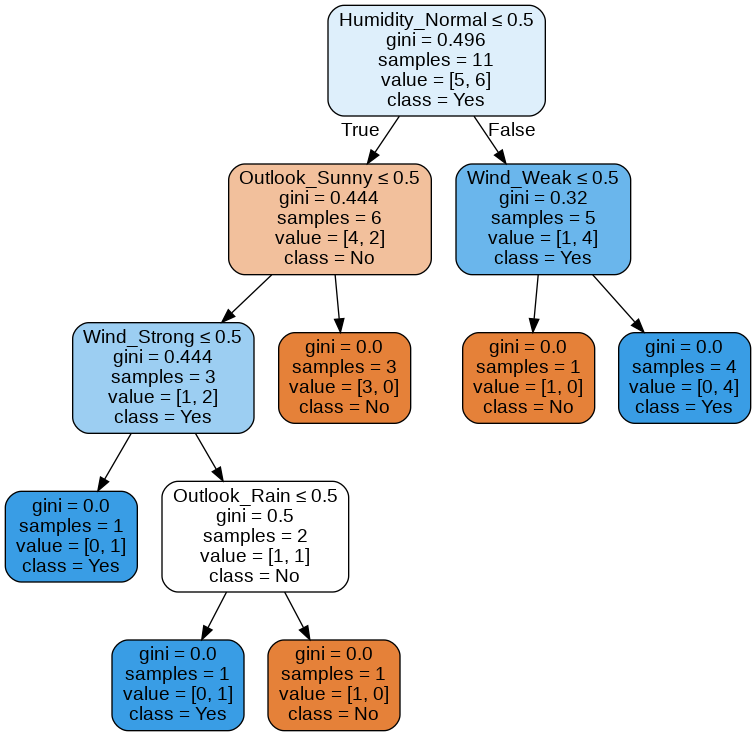

In [11]:
#arvore de Gini
dot_data = StringIO()
export_graphviz(clf_g, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore2.png')
Image(graph.create_png())

Podemos medir a acurácia testando quantas instâncias são classificadas corretamente. Observe que usamos todas as instâncias disponíveis no treinamento. A acurácia obtida foi 1, indicando que classificamos corretamente todos os exemplos de nosso conjunto.

In [12]:
# Usando modelo para classificar os dados que temos a disposição
y_pred = clf.predict(X_test)
y_pred2 = clf_g.predict(X_test)

# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Accuracy Entropy:",metrics.accuracy_score(Y_test, y_pred))
print("Accuracy Gini:",metrics.accuracy_score(Y_test, y_pred2))


Accuracy Entropy: 0.6666666666666666
Accuracy Gini: 0.3333333333333333


Resolvendo o exercicio com K Fold

In [13]:
def calculaAcuracia(clf2, Y_test, X_test):
  y_pred = clf2.predict(X_test)
  a = metrics.accuracy_score(Y_test, y_pred)
  print("Accuracy Entropy:", a)

  return a

In [14]:
def calculaMedia(acuracias):
  soma = sum(acuracias)
  media = soma/len(acuracias)

  print("Media das acuracias:", media)

In [15]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
T = Xone_hot_data.to_numpy()
acuracias = []

for train_index, test_index in kf.split(T):
  clf2 = DecisionTreeClassifier(criterion="entropy")
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = T[train_index], T[test_index]
  #print(X_train)
  #print(X_test)
  Y_train, Y_test = y[train_index], y[test_index]
  #print(Y_train)
  #print(Y_test)
  clf2 = clf2.fit(X_train, Y_train)
  acuracias.append(calculaAcuracia(clf2, Y_test, X_test))

calculaMedia(acuracias)
  

TRAIN: [ 5  6  7  8  9 10 11 12 13] TEST: [0 1 2 3 4]
Accuracy Entropy: 0.6
TRAIN: [ 0  1  2  3  4 10 11 12 13] TEST: [5 6 7 8 9]
Accuracy Entropy: 0.6
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11 12 13]
Accuracy Entropy: 0.75
Media das acuracias: 0.65


<h1>1. No programa feito em aula, usamos todos os exemplos para treinar o classificador de árvore de decisão. Mas podemos dividir o conjunto de exemplos em conjuntos de treinamento e teste usando sklearn.model_selection.train_test_split.

a) Divida o conjunto de exemplos em treinamento e teste das seguintes formas:

* 60% treinamento e 40% teste
* 80% treinamento e 20% teste

Em cada um dos casos, gere a árvore de decisão correspondente e indique qual a
acurácia obtida no treinamento e no teste. Compare as árvores obtidas e comente
suas observações.

<h3> RESULTADOS (60% treinamento e 40% teste)

**Caso 1)**

Linhas selecionadas:
```
Treino:
13
6
12
10
3
8
11
9

Teste:
1
0
4
2
5
7
```
Acurácia: 0.5

Árvore: 

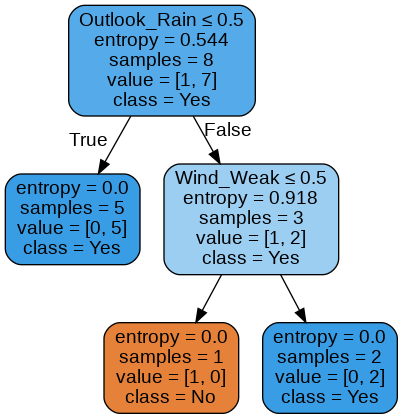






**Caso 2)**

Linhas selecionadas:
```
Treino:
2
8
1
10
11
3
9
4

Teste:
5
6
0
13
7
12
```
Acurácia: 0.3333333333333333

Árvore: 

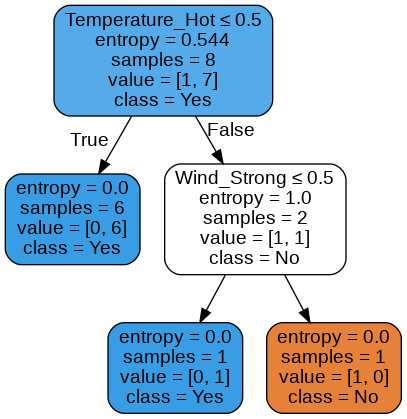






**Caso 3)**

Linhas selecionadas:
```
Treino:
4
9
12
11
5
0
13
2

Teste:
6
8
10
1
7
3
```
Acurácia: 0.6666666666666666

Árvore: 

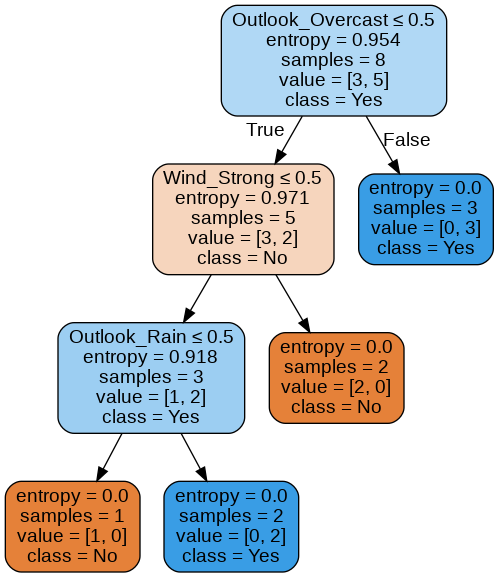

**Caso 4)** 

obs: Perceba como este é um caso muito ruim.
<br><br>
Linhas selecionadas:
```
Treino:
3
5
6
10
9
0
1
7

Teste:
2
11
13
12
8
4
```
Acurácia: 0.16666666666666666

Árvore: 

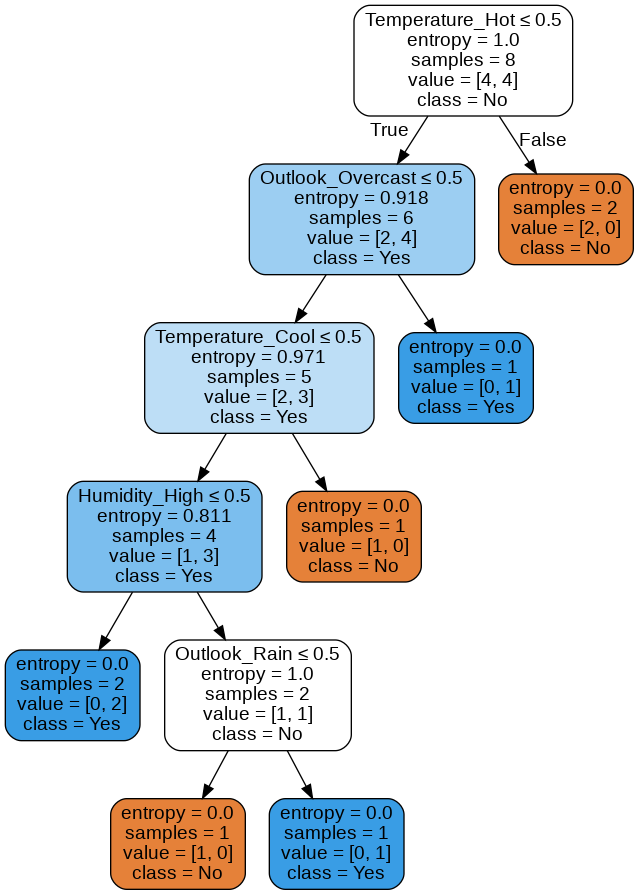

<h3> RESULTADOS (80% treinamento e 20% teste):

**Caso 1)**

Linhas selecionadas:
```
Treino:
6
8
11
1
2
0
7
12
13
10
3

Teste:
9
4
5
```
Acurácia: 0.6666666666666666

Árvore: 

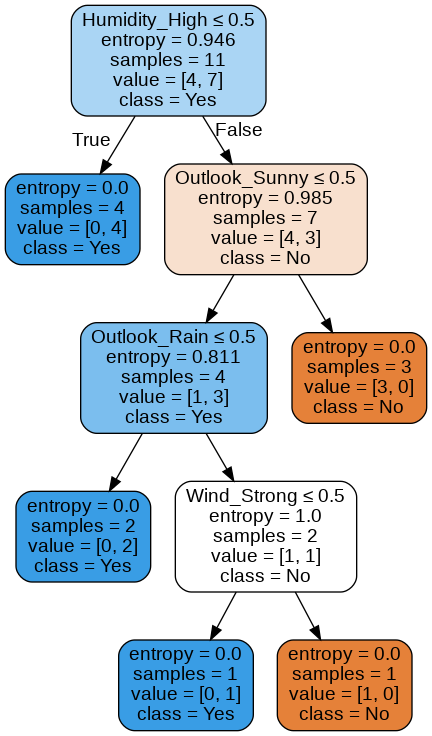






**Caso 2)**

Linhas selecionadas:
```
Treino:
9
12
11
3
10
4
5
0
6
13
7

Teste:
2
1
8
```
Acurácia: 1.0 

Árvore: 

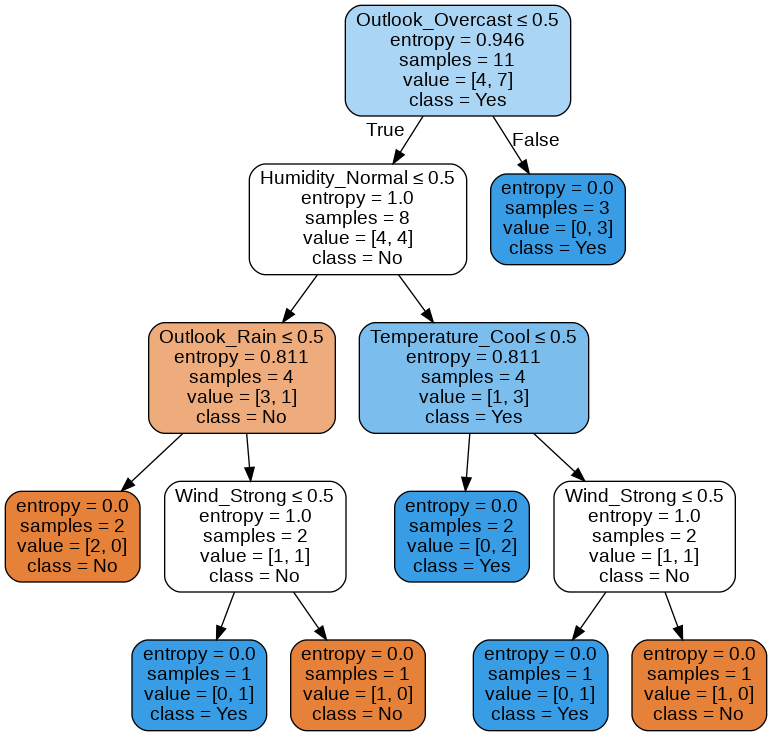






**Caso 3)**

Linhas selecionadas:

```
Treino:
0	
1	
11	
7	
9	
12	
2	
13
4	
6	
10	

Teste:
3	
8	
5	
```

Acurácia: 0.3333333333333333

Árvore:

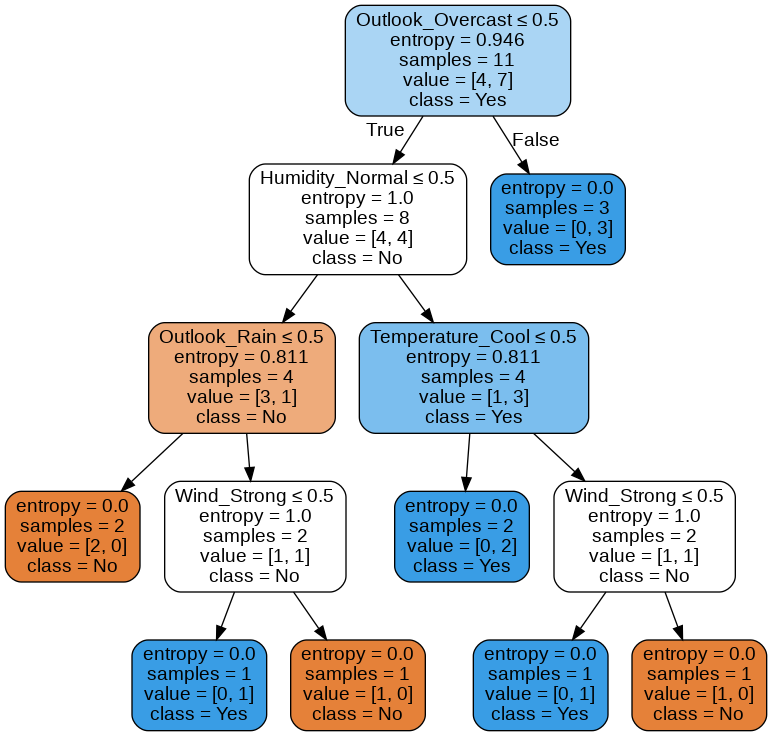

**Observações:**
* Ao rodar ambos os casos, de 60/40 e de 80/20, percebemos que, na maioria das tentativas, a acurácia era 0.6666666666666666;
* O caso de 60/20 apresentou uma acurácia muito baixa em uma das tentativas. Foi de  0.16666666666666666;
* No caso de 80/20, encontramos na maioria das execuções acurácias 0.666666666 ou 1.0.

<h1>2. Utilizamos a entropia para escolher os atributos. Use o índice Gini
(https://medium.com/analytics-steps/understanding-the-gini-index-and-information-ga
in-in-decision-trees-ab4720518ba8) ao invés da entropia. Você deve repetir o experimento considerando que o conjunto de exemplos não foi dividido em treinamento e teste, e considerando as divisões do exercício anterior. Indique a acurácia em cada caso (preencha a seguinte tabela). Compare as árvores obtidas
quando usamos a entropia e o índice gini.

<table>
  <tr>
    <th>Treinamento</th>
    <th>Entropia</th>
    <th>Gini</th>
  </tr>
  <tr>
    <td>100% - 0%</td>
    <td> 1.0 </td>
    <td> 1.0 </td>
  </tr>
  <tr>
    <td>60% - 40%</td>
    <td> 0.5 </td>
    <td>0.6666666666666666
</td>
  </tr>
  <tr>
    <td>80% - 20%</td>
    <td>1.0</td>
    <td> 0.6666666666666666</td>
  </tr>
</table>

Treinamento 100% - 0%, árvores comparativas:

Entropia

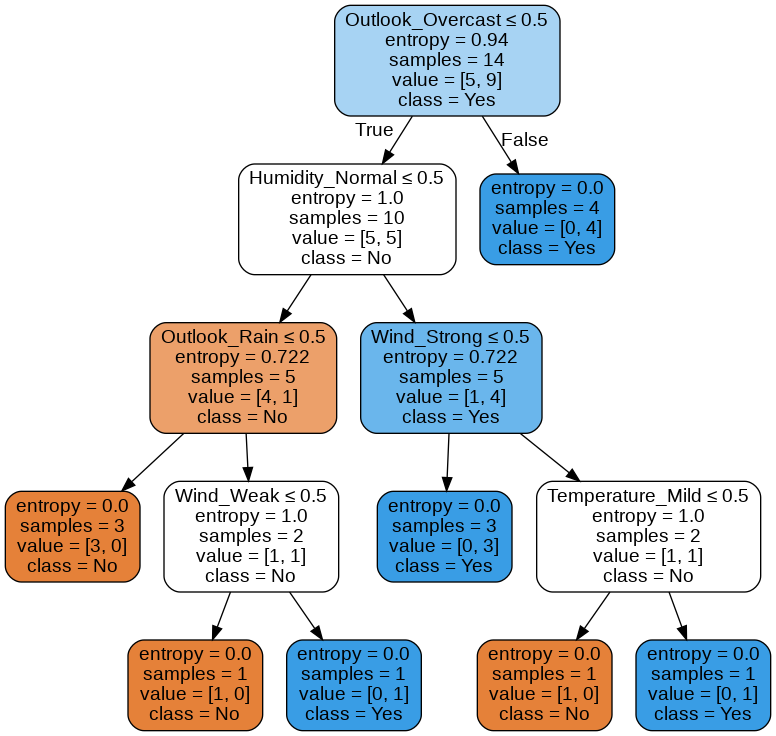

Gini

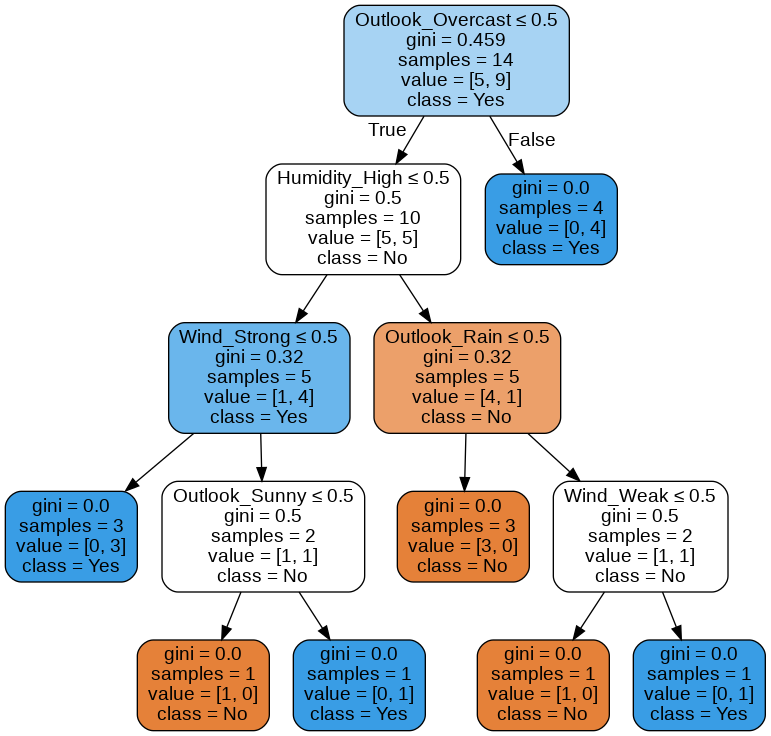

Treinamento 60% - 40%, árvores comparativas: 

Entropia:

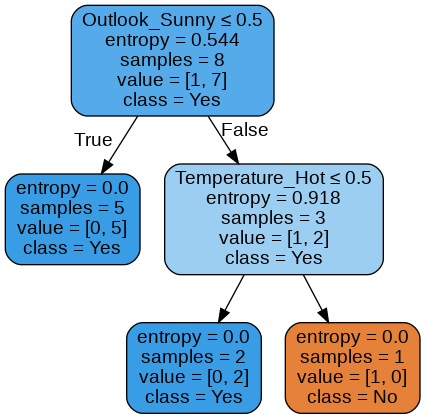

Gini:

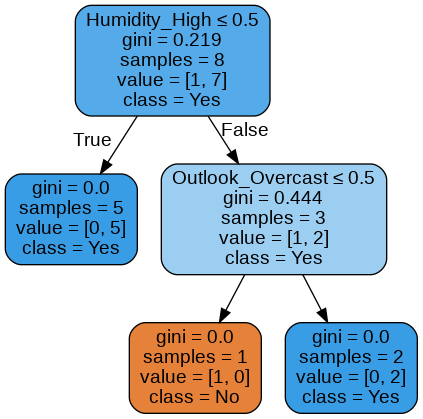

Treinamento 80% - 20%, árvores comparativas:

Entropia:

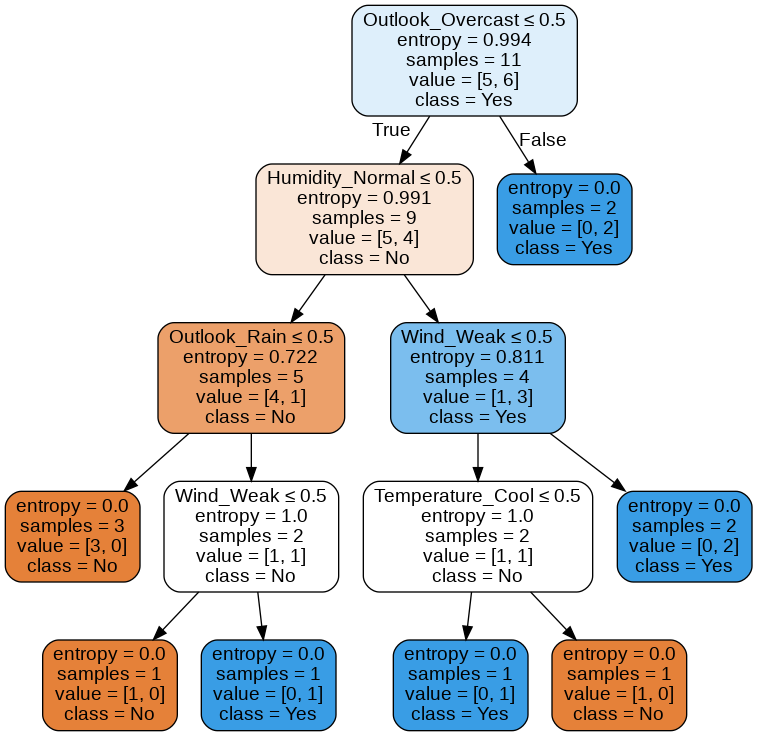

Gini:

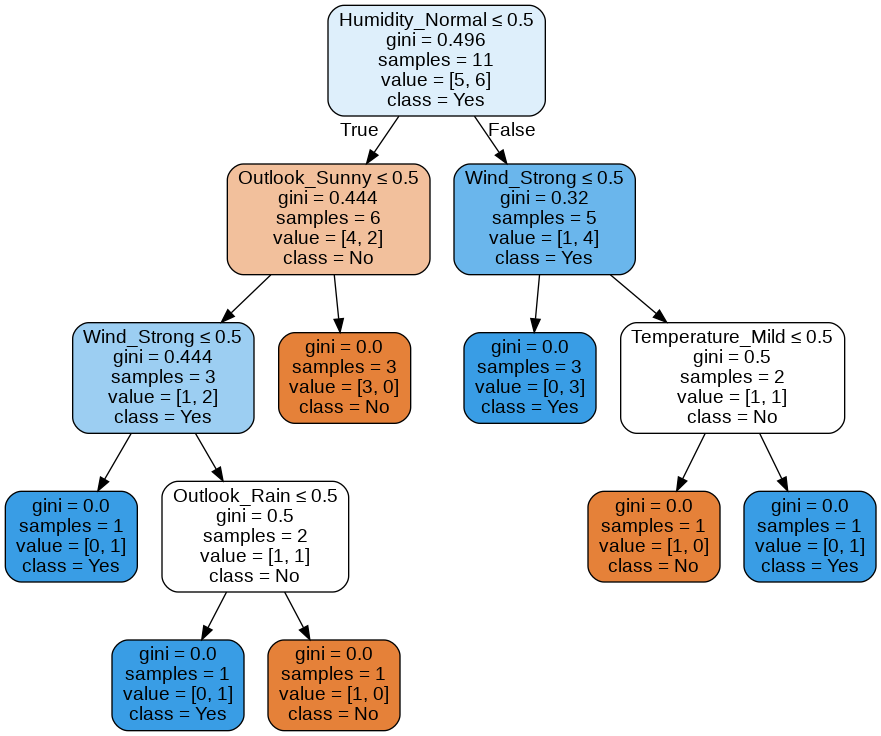

<h1>3. Podemos fazer o treinamento usando a validação cruzada k-fold
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFo
ld.html). Aplique a validação cruzada para k = 3,8,14 gerando a seguinte tabela:

**3-fold**<br>
TRAIN: [ 5  6  7  8  9 10 11 12 13] TEST: [0 1 2 3 4]<br>
Accuracy Entropy: 0.6<br>
TRAIN: [ 0  1  2  3  4 10 11 12 13] TEST: [5 6 7 8 9]<br>
Accuracy Entropy: 0.8<br>
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11 12 13]<br>
Accuracy Entropy: 1.0<br><br>
Media da acuracia: 0.7999999999999999<br><br>

**8-fold**<br>
TRAIN: [ 2  3  4  5  6  7  8  9 10 11 12 13] TEST: [0 1]<br>
Accuracy Entropy: 1.0<br>
TRAIN: [ 0  1  4  5  6  7  8  9 10 11 12 13] TEST: [2 3]<br>
Accuracy Entropy: 0.5<br>
TRAIN: [ 0  1  2  3  6  7  8  9 10 11 12 13] TEST: [4 5]<br>
Accuracy Entropy: 0.5<br>
TRAIN: [ 0  1  2  3  4  5  8  9 10 11 12 13] TEST: [6 7]<br>
Accuracy Entropy: 0.5<br>
TRAIN: [ 0  1  2  3  4  5  6  7 10 11 12 13] TEST: [8 9]<br>
Accuracy Entropy: 0.5<br>
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 12 13] TEST: [10 11]<br>
Accuracy Entropy: 0.5<br>
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13] TEST: [12]<br>
Accuracy Entropy: 1.0<br>
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13]<br>
Accuracy Entropy: 0.0<br>
Media da acuracia: 0.5625<br><br>


**14-fold**<br>
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [0]<br>
Accuracy Entropy: 1.0<br>
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [1]<br>
Accuracy Entropy: 1.0<br>
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13] TEST: [2]<br>
Accuracy Entropy: 1.0<br>
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13] TEST: [3]<br>
Accuracy Entropy: 0.0<br>
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13] TEST: [4]<br>
Accuracy Entropy: 1.0<br>
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13] TEST: [5]<br>
Accuracy Entropy: 0.0<br>
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13] TEST: [6]<br>
Accuracy Entropy: 1.0<br>
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13] TEST: [7]<br>
Accuracy Entropy: 0.0<br>
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13] TEST: [8]<br>
Accuracy Entropy: 1.0<br>
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13] TEST: [9]<br>
Accuracy Entropy: 1.0<br>
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13] TEST: [10]<br>
Accuracy Entropy: 0.0<br>
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13] TEST: [11]<br>
Accuracy Entropy: 0.0<br>
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13] TEST: [12]<br>
Accuracy Entropy: 1.0<br>
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13]<br>
Accuracy Entropy: 0.0<br>
Media da acuracia: 0.5714285714285714<br><br>

<h1>O que você pode concluir a partir dos resultados obtidos?

Percebemos que de acordo que o número de folds aumentava a acurácia diminuia. Vimos, com esse aumento do número de folds, o teste só ocorria com um caso o que pode deixar a acurácia excelente ou péssima. 